# Project-02: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## 1.Introduction
<html>
<body>

<p>For this project I investigated the No-show appointment dataset which was my choice among others datasets provided by Udacity. This dataset collects information from 100k medical appointments in Brazil, focusing on the question of whether or not patients show up to their appointment.We have to mention that the dataset originated from Kaggle. More information could be found on the following link  <a href="https://www.kaggle.com/joniarroba/noshowappointments/home" target="_blank">her</a>.
</p>

<p>No-show appointment dataset contains number of attributes:</p>
     
<table style="width:50%" align="center" >

  <tr >
    <th>Attributes</th>
    <th>Description</th> 
  </tr>
  <tr>
    <td>PatientId</td>
    <td>A number that identify each patient</td>
  </tr>
  <tr>
    <td>AppointmentID</td>
    <td>A number that identify each appointment </td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>Male or Female</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Patient age </td>
  </tr>  
  <tr>
    <td>ScheduledDay</td>
    <td>Tells us on what day the patient set up their appointment</td>
  </tr>  
  <tr>
    <td>AppointmentDay</td>
    <td>Appointment date </td>
  </tr>  
  <tr>
    <td>Neighborhood</td>
    <td>Indicates the location of the hospital</td>
  </tr>   
  <tr>
    <td>Scholarship</td>
    <td>Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família</td>
  </tr> 
  <tr>
    <td>Hipertension</td>
  </tr> 
  <tr>
    <td>Diabetes</td>
  </tr> 
 <tr>
    <td>Alcoholism</td>
  </tr> 
  <tr>
    <td>Handcap</td>
  </tr>    
   <tr>
    <td>SMS_received</td>
    <td>Identify weather a patient received SMS or not </td>
  </tr> 
  <tr>
    <td>No-show</td>
    <td>it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. </td>
  </tr>     
</table>
<hr>
<br>
<b>  In this analysis we will focus on answering the following questions:</b>
<ol>
<li>Does the duration between the scheduled date and appointment date affect show up in appointment ?</li>
<li>Is there any relation between gender and patients who show up in appointments?</li>
<li>Dose receiving an SMS have an impact on  patient show up for their scheduled appointment ?</li>

</ol>
    
</body>
</html>

### List for the import statements for all  packages that I will use :


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## 2.Data Wrangling
<p> This section of the report shows load the data process and check for cleanliness, and then trim and clean the dataset for analysis.
</p>

### General Properties

In [2]:
# Load data from csv file into a Pandas dataframe
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#display the first five rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(110527, 14)

Our Dataset has 110527 entries and each row is associated with 14 attributes

In [4]:
# this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Investigate the Object Data type

In [5]:
ColumnType=['Gender','ScheduledDay','AppointmentDay','Neighbourhood','No-show']
for i,v in enumerate (ColumnType):
    print(ColumnType[i],":",type(df[v][0]))
    


Gender : <class 'str'>
ScheduledDay : <class 'str'>
AppointmentDay : <class 'str'>
Neighbourhood : <class 'str'>
No-show : <class 'str'>


All the data types that are object are of type of string

 Investigate if there is NaN values

In [6]:
#check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


from the output we can obsereve that there is no NaN values

In [7]:
df['Age'].unique()


array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

You can see that there is anomalies like -1

### Data Cleaning

#### 1. Remove anomalies in Age column 

In [8]:
df.drop(df[df['Age'] <= 0].index,inplace = True) 
#check if anomalies removed
df['Age'].unique()


array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

#### 2. Converting the AppointmentDay column and ScheduledDay column data type from object (string) into DateTime type  



In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
#to check the changes is applied
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106987 non-null  float64            
 1   AppointmentID   106987 non-null  int64              
 2   Gender          106987 non-null  object             
 3   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 5   Age             106987 non-null  int64              
 6   Neighbourhood   106987 non-null  object             
 7   Scholarship     106987 non-null  int64              
 8   Hipertension    106987 non-null  int64              
 9   Diabetes        106987 non-null  int64              
 10  Alcoholism      106987 non-null  int64              
 11  Handcap         106987 non-null  int64              
 12  SMS_received    106987 non-null  int64              
 13  No-show       

#### 3.Calculating the duration between the scheudel time and appointment time 

In [10]:
# calculate the Duration between appointment and scheduled day

df['Dureation']=((df.AppointmentDay-df.ScheduledDay).dt.days)+1
df.to_csv("noshowappointments-kagglev2-may-2016.csv", index=False)

#to check the Duration changes is applied
D=df
D= D.iloc[:20, np.r_[1:2,3:5, 14:15]]
D.tail(20)



,AppointmentID,ScheduledDay,AppointmentDay,Dureation
0,5642903,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0
1,5642503,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0
2,5642549,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0
3,5642828,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0
4,5642494,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0
5,5626772,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,2
6,5630279,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,2
7,5630575,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,2
8,5638447,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,0
9,5629123,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,2


In [11]:
 df.Dureation.unique()
 

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        73,  64,  20,  49,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  77,
        69,  76,  89,  81,  79,  54,  68,  75,  85, 112,  -1,  80,  86,
        98,  94,  83, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 103, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123])

There is negative values,we have to remove these values because it not possible the Scheduled Day deta came after the Appointment Day date.

In [12]:
df.drop(df[df['Dureation'] <0].index,inplace = True) 
#check if anomalies removed
df.Dureation.unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        73,  64,  20,  49,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  77,
        69,  76,  89,  81,  79,  54,  68,  75,  85, 112,  80,  86,  98,
        94,  83, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90, 151,
       126, 127, 111, 119,  74,  71,  82, 103, 108, 110, 102, 122, 101,
       105,  92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123])

#### 4.Rename No-Show colum 

In [13]:
df.rename(columns ={'No-show': 'Noshow'}, inplace = True)
#check if changes applied 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106982 non-null  float64            
 1   AppointmentID   106982 non-null  int64              
 2   Gender          106982 non-null  object             
 3   ScheduledDay    106982 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106982 non-null  datetime64[ns, UTC]
 5   Age             106982 non-null  int64              
 6   Neighbourhood   106982 non-null  object             
 7   Scholarship     106982 non-null  int64              
 8   Hipertension    106982 non-null  int64              
 9   Diabetes        106982 non-null  int64              
 10  Alcoholism      106982 non-null  int64              
 11  Handcap         106982 non-null  int64              
 12  SMS_received    106982 non-null  int64              
 13  Noshow        

#### 5.Update NoShow colum by 1 and 0

In [14]:
#replace yes by 1 and no by 0
df['Noshow'].replace(['Yes','No'],[1,0],inplace=True)
df.to_csv("noshowappointments-kagglev2-may-2016.csv", index=False)
df.head(50)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,Dureation
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,2
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,2
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,2
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,2


 <a id='eda'></a>
## 3.Exploratory Data Analysis
<p> This section of the report shows  statistics and create visualizations with the goal of addressing the research questions that posed in the Introduction.
</p>

<p>- Explore All numeric columns:
</p>

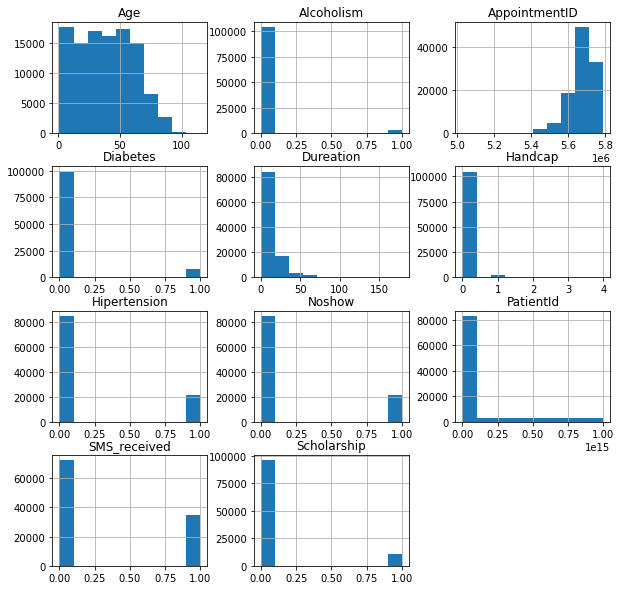

In [15]:
df.hist(figsize=(10, 10));

<p>-Explore No-show coulmn</p>

The number of patients showed up to their appointment : 85307
The number of patients did not showed up to their appointment : 21675


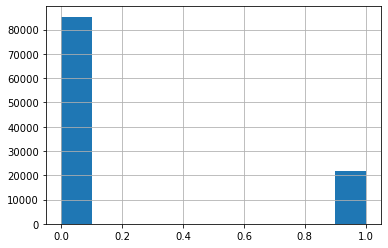

In [16]:
yes=len(df[df['Noshow'] == 1])
no=len(df[df['Noshow'] == 0])
df['Noshow'].hist();
print('The number of patients showed up to their appointment :',no)
print('The number of patients did not showed up to their appointment :',yes)

In [17]:
# function to calculate the percentage
def Percentage(value,total):
   perc=((value/total)*100).round()
   return perc

In [18]:
#function to create Plot
def creat_plot(x,y,kind,title,set_ylabel,data):
  plot=data.plot(x=x, y=y, kind=kind,title=title);
  plot.set_ylabel(set_ylabel)


### Addressing research questions

### 1.Does the duration between the scheduled date and appointment date affect show up in appointment ?

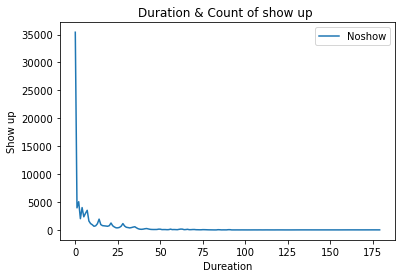

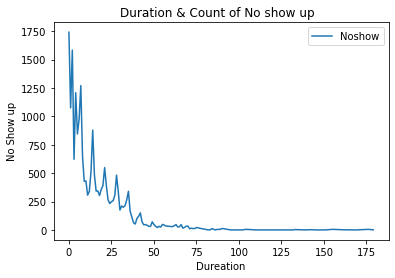

In [19]:
#Group by Dureation for all patients show up 
nn=df[df['Noshow']==0]
n=nn.groupby('Dureation').count().reset_index()

#Group by Dureation for all patients No show up 
nn2=df[df['Noshow']==1]
n2=nn2.groupby('Dureation').count().reset_index()

#create plot function call
creat_plot('Dureation','Noshow','line','Duration & Count of show up ',"Show up",n)

creat_plot('Dureation','Noshow','line','Duration & Count of No show up  ',"No Show up",n2)


<p>A further analysis focusing on the duration from 0 to 25 gap days where a distinction difference has been observed.  

</p>

In [20]:
#The number of patients show up with duration from(0 to 25)
num_show=n[n['Dureation'] <=25].sum()

#The number of patients no show up with duration from(0 to 25)
num_Noshow=nn2[nn2['Dureation'] <=25].sum()

#The number of patients with duration from(0 to 25)
total=num_Noshow.Noshow+num_show.Noshow

perc_show=Percentage(num_show.Noshow,total)
print('The percentage of patients show up with duration from(0 to 25):{0} %\n'.format(perc_show))

perc_Noshow=Percentage(num_Noshow.Noshow,total)
print('The percentage of patients No show up with duration from(0 to 25):{0} %\n'.format(perc_Noshow))


The percentage of patients show up with duration from(0 to 25):82.0 %

The percentage of patients No show up with duration from(0 to 25):18.0 %



### 2.Is there any relation between Gender and patients who show up in appointments?

In [21]:
# group by Gender and count the no shows

dfg=df.groupby('Gender').Noshow.sum().reset_index()
#calculate percentage
F_Percentage=Percentage(dfg['Noshow'].iloc[0],len(df[df['Gender']=='F']))
M_Percentage=Percentage(dfg['Noshow'].iloc[1],len(df[df['Gender']=='M']))
#print result
print('Percentage of the female Patients that missed their appointment : {0} %\n'.format(F_Percentage))
print('Percentage of the male Patients that missed their appointment : {0} %\n'.format(M_Percentage))

dfg.head()

Percentage of the female Patients that missed their appointment : 20.0 %

Percentage of the male Patients that missed their appointment : 20.0 %



,Gender,Noshow
0,F,14272
1,M,7403


The table above shows patients that missed their appointment classified by Gender

,Gender,Noshow,show
0,F,14272,55843
1,M,7403,29464


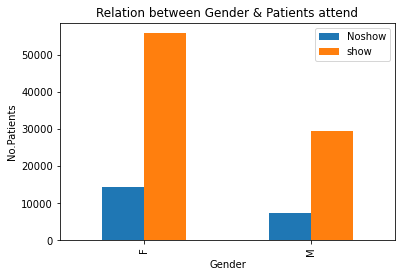

In [22]:
#To draw the bar plot
k=dfg.groupby('Gender').Noshow.sum().reset_index()
showF=len(df[(df['Noshow'] == 0) &(df['Gender'] == 'F')])
showM=len(df[(df['Noshow'] == 0) &(df['Gender'] == 'M')])
k['show']=[showF,showM]
df_gender_bar = k.plot(kind="bar",x='Gender')
df_gender_bar.set_title("Relation between Gender & Patients attend")
df_gender_bar.set_xlabel("Gender")
df_gender_bar.set_ylabel("No.Patients")             
k.head()
             

<p> From the above plot and previous statistics we can observe that the percentage for both female and male whos did not attend their appointments is 20%.</p>


### 3.Dose receiving an SMS have an impact on  patient show up for their scheduled appointment ?

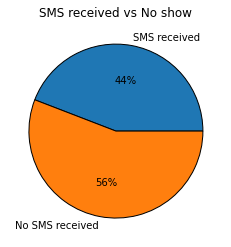

In [23]:
SMS=df.loc[(df['SMS_received']==1)&(df['Noshow']==1)].count()[0]#No of patients that recive sms and no show in appintment
No_SMS=df.loc[(df['SMS_received']==0)&(df['Noshow']==1)].count()[0]#No of patients that did not recive sms and no show in appintment
lable=['SMS received','No SMS received']
plt.pie([SMS,No_SMS],labels=lable,wedgeprops={'edgecolor':'black'},autopct='%1.f%%')
plt.title('SMS received vs No show')
plt.show()

<p>The above pie chart shows the percentages of patients that missed their appointment and received SMS .44% patients no show even they recived SMS and 56% patients no show and didnt recived SMS.
Received SMS has no much impact on the patients attended their appointments</p>

### Limitations

<ul> 
<li>The time of the appointments in all records is 00:00:00, so that limit our analysis.Sence the time of appointments could help us to get accurate analysis.</li>

<li>The dataset explored in this analysis has recorded the appointments attendance where the appointments Scheduled on the period from April till June .As the period is 3 months is a short period of time we need to data with big period of time to obtain accurate analysis and result with low uncertainty.</li>



</ul>

# <a id='conclusions'></a>
## 4.Conclusions

<p>This exploratory and statistices analysis result the following findings :</p>
<ul>
<li>TThe analysis of the association between the number of patients that were no show to an  appointement and duration
 ,show that number of patients  show up is more than no show up patients at  duration between  0 to 25  gap days .Where the  percentage of show up  patients is 82% while the no show up patients is 18%.
</li> 
<li> Gender has no corrleation with patients that they were no show to an appointement ,where the precentage for both gender is 20%.</li>
<li>The SMS factor has no impact on show up ito an  appointment.</li>

</ul>